# Import Libraries

In [1]:
# Import all the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objects as go
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Read files using pandas modules
df=pd.read_csv(r'C:\Users\SHREE\Downloads\Mentorships\Analyze Mobile App Data on various platforms and generate recommendations based on the analysis and various metrics available in the datasets using Python\googleplaystore.csv\googleplaystore.csv')

# Data Analysis and Data Cleaning

In [3]:
# read first five row in data 
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#Check the shape of the data
df.shape

(10841, 13)

In [5]:
# Check the information in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
#Checking column names in the dataset
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
#Look for the number of unique Apps
df['App'].nunique()

9660

In [8]:
#Checking unique categories in the data
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [9]:
#Total number of unique categories
df['Category'].nunique()

34

- There are 34 different categoris

In [10]:
# The gradation of installations in the dataframe
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [11]:
# There are a lot of app sizes
df["Size"].nunique()

462

In [12]:
# Looking unique ratings in the dataframe
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [13]:
#Checking number of unique values for the rating
df['Rating'].nunique()

40

- There are 40 unique ratings in the dataframe

In [14]:
# Viewing the content rating; who is permitted to download these apps
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [15]:
# the number of categories of the age content rating

len(df["Content Rating"].unique())

7

# Data Cleaning

In [16]:
#Dropping duplicated rows
#On play store, two apps may have same name, but all the size, installs, rating, reviews, price need not be same. so using these categories, we will drop the duplicates in the data
df.drop_duplicates(['App','Size','Installs','Reviews','Rating','Price','Android Ver'], inplace=True)

In [17]:
#Checking each column in the data for null values
df.isnull().sum()


App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [18]:
# Dropping the entries where there are missing values
df=df.dropna()

In [19]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Exploring the Data

In [20]:
#Checking unique categories in the Type of the Apps
df["Type"].value_counts()

Free    8268
Paid     610
Name: Type, dtype: int64

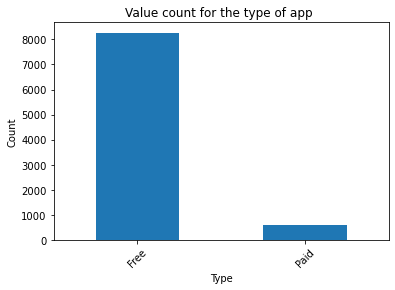

In [21]:
df["Type"].value_counts().plot.bar()
plt.ylabel("Count")
plt.xlabel("Type")
plt.title("Value count for the type of app ")
plt.xticks(rotation=45)

plt.show()

In [22]:
#Looking for the description of data set
df.describe()

,Rating
count,8878.000000
mean,4.187745
std,0.522572
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [23]:
# Converting the data in the column "Reviews" to float to that we can apply statistics
df.Reviews= df.Reviews.astype(float) 

In [24]:
df.describe()

,Rating,Reviews
count,8878.000000,8.878000e+03
mean,4.187745,4.729619e+05
std,0.522572,2.906987e+06
min,1.000000,1.000000e+00
25%,4.000000,1.640000e+02
50%,4.300000,4.708000e+03
75%,4.500000,7.119725e+04
max,5.000000,7.815831e+07


In [25]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [26]:
# To convert the column "Installs" into float
# So, firstly remove the "+"
df.Installs= df["Installs"].str.replace("+", "")

In [27]:
# While converting the column into float,we have to remove ',' to
# So, removing the commas
df.Installs= df["Installs"].str.replace(",", "")

In [28]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [29]:
df["Installs"] = pd.to_numeric(df["Installs"])

In [30]:
# Removing "$" from the data entries in the column "Price" so that it can be converted to float
df["Price"]= df["Price"].str.replace("$", "")

In [31]:
# Convert the data in "Price" to float
df["Price"]= df.Price.astype(float)

In [32]:
# the data in the column "Prics" successfully converted to float
# In these columns i can do various statistical applications
df.describe()

,Rating,Reviews,Installs,Price
count,8878.000000,8.878000e+03,8.878000e+03,8878.000000
mean,4.187745,4.729619e+05,1.649903e+07,0.963719
std,0.522572,2.906987e+06,8.643798e+07,16.201978
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.640000e+02,1.000000e+04,0.000000
50%,4.300000,4.708000e+03,5.000000e+05,0.000000
75%,4.500000,7.119725e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


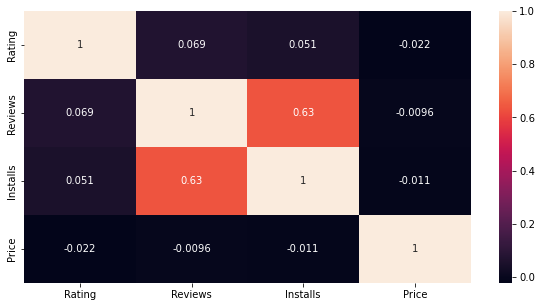

In [33]:
#Correlation Heatmap
plt.figure(figsize=(10,5))
corr= df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [34]:
# procedure for converting the column "Size" to float
# there are sizes counted in mb, kb, in numbers without measurement unit and with "varies with device"
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [35]:
# removing the "m" which is the mb for the size
df.Size= df["Size"].str.replace("M", "")
df.Size= df['Size'].str.replace("Varies with device","-1")

In [36]:
#Here we replace k and change the unit to Mb
df['Size']=df['Size'].apply(lambda x: str(round((float(x.rstrip('k'))/1024),1) )if x[-1]=='k' else x)

In [37]:
df.Size.unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '23',
       '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', '-1', '9.4', '15',
       '10', '1.2', '26', '8.0', '7.9', '56', '57', '35', '54', '0.2',
       '3.6', '5.7', '8.6', '2.4', '27', '2.7', '2.5', '7.0', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '22', '6.4', '3.2',
       '8.2', '4.9', '9.5', '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0',
       '2.3', '2.1', '42', '9.1', '55', '0.0', '7.3', '6.5', '1.5', '7.5',
       '51', '41', '48', '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40',
       '7.8', '8.8', '6.6', '5.1', '61', '66', '0.1', '8.4', '3.7', '44',
       '0.7', '1.6', '6.2', '53', '1.4', '3.0', '7.2', '5.8', '3.8',
       '9.6', '45', '63', '49', '77', '4.4', '70', '9.3', '8.1', '36',
       '6.9', '7.4', '84', '97', '2.0', '1.9', '1.8', '5.

In [38]:
#As the columns of Genres is same as the column for category, we drop the column for Genres.
#Also, the column of android version, current version, Last updated are not of our use, so we drop these columns.
df.drop(['Genres','Last Updated','Current Ver',"Android Ver"],axis=1,inplace=True)

In [39]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone


In [40]:
# Here we find the count of rating for each possible mean rating
rating_most=df.Rating.value_counts()

In [41]:
df.Rating.value_counts()

4.4    1030
4.3    1016
4.5     975
4.2     885
4.6     767
4.1     655
4.0     538
4.7     482
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      63
2.9      45
2.8      40
2.6      24
2.7      23
2.5      20
2.3      20
2.4      19
1.0      16
2.2      14
1.9      12
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

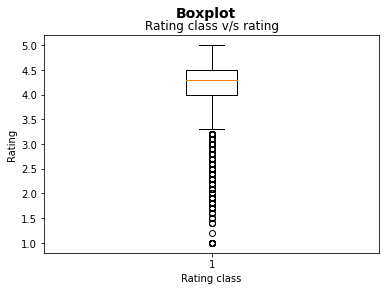

In [42]:
# figure related code
fig = plt.figure()
fig.suptitle('Boxplot', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.boxplot(df['Rating'])
ax.set_title('Rating class v/s rating')
ax.set_xlabel('Rating class')
ax.set_ylabel('Rating')
plt.show()

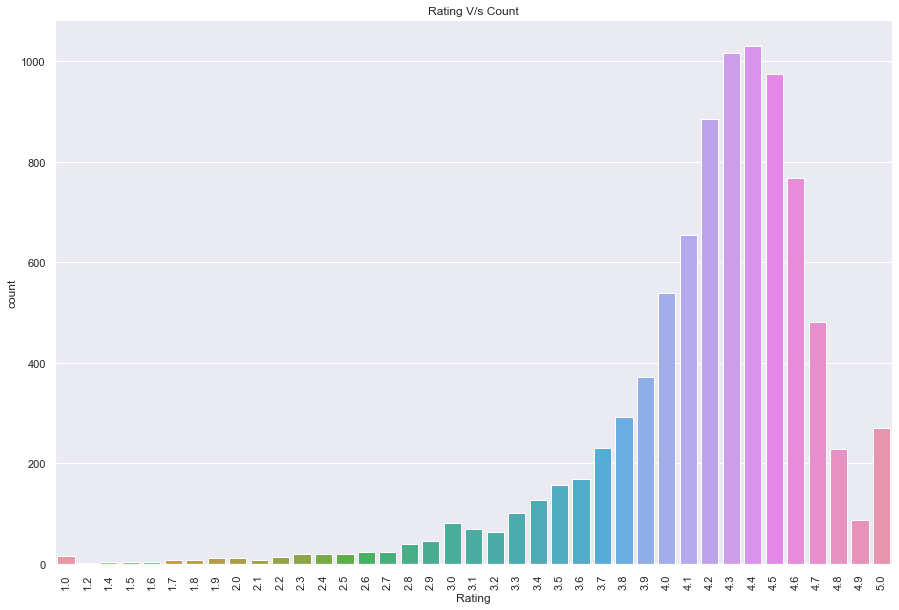

In [43]:
# Count plot for rating
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")
#dat = sns.load_dataset("df")
plt.xticks(rotation=90)
plt.title("Rating V/s Count")
ax = sns.countplot(x="Rating", data=df)

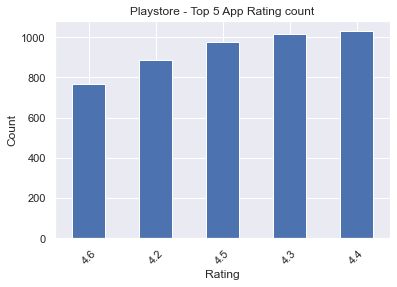

In [44]:
#We look at the top five value counts  for rating 
df["Rating"].value_counts().head(5).sort_values(ascending=True).plot.bar()#head()=nlargest(5)
plt.ylabel("Count")
plt.xlabel("Rating")
plt.title("Playstore - Top 5 App Rating count")
plt.xticks(rotation=45)
plt.show()

In [45]:
# we make different classes/dataframes for the app rating
app_rating1=df[df['Rating'] >= 4]
app_rating2=df[(df['Rating'] < 4) & (df['Rating'] > 3 )]
app_rating3= df[df['Rating'] <=3]

In [46]:
#Checking the shape of each dataframe
app_rating1.shape,app_rating2.shape,app_rating3.shape

((6934, 9), (1582, 9), (362, 9))

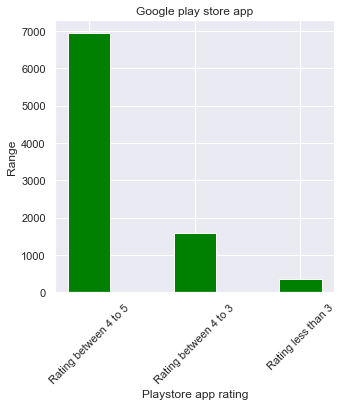

In [47]:
# creating the dataset
# Plot show there are more than 7000 apps having rating more than 4

data = {'Rating between 4 to 5':6934, 'Rating between 4 to 3':1582, 'Rating less than 3':362,
        }
x = list(data.keys())
y = list(data.values())

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(x, y, color ='green',
        width =0.4)

plt.xlabel("Playstore app rating")
plt.ylabel("Range")
plt.title("Google play store app")
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

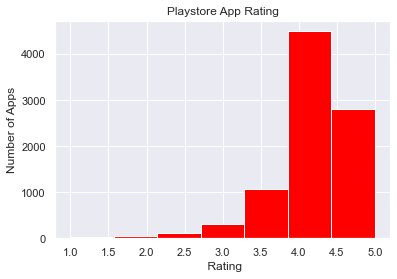

In [48]:
#Here we use the hist plot for the app rating
app_rating= df["Rating"]
num_bins=7
plt.hist(app_rating, num_bins, facecolor="red", alpha = 1)
plt.title('Playstore App Rating')
plt.xlabel(" Rating")
plt.ylabel("Number of Apps")
plt.show

In [49]:
#Here we try to find the apps with rating 5
df1=df[df['Rating']==5]

In [50]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15.0,37,1000,Free,0.0,Everyone
612,American Girls Mobile Numbers,DATING,5.0,5.0,4.4,1000,Free,0.0,Mature 17+
615,Awake Dating,DATING,5.0,2.0,70,100,Free,0.0,Mature 17+
633,Spine- The dating app,DATING,5.0,5.0,9.3,500,Free,0.0,Teen
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6.0,5.0,100,Free,0.0,Mature 17+


In [51]:
#There are 271 apps having rating 5
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 329 to 10837
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             271 non-null    object 
 1   Category        271 non-null    object 
 2   Rating          271 non-null    float64
 3   Reviews         271 non-null    float64
 4   Size            271 non-null    object 
 5   Installs        271 non-null    int64  
 6   Type            271 non-null    object 
 7   Price           271 non-null    float64
 8   Content Rating  271 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 21.2+ KB


In [52]:
#Here I try to sort app with rating 5 corresponding to installs and reviews
df1=df1.sort_values(by=['Installs','Reviews'], ascending=False)
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
9511,Ek Bander Ne Kholi Dukan,FAMILY,5.0,10.0,3.0,10000,Free,0.00,Everyone
8058,Oración CX,LIFESTYLE,5.0,103.0,3.8,5000,Free,0.00,Everyone
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34.0,12,5000,Free,0.00,Everyone
7514,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24.0,3.2,5000,Free,0.00,Everyone
10357,Ríos de Fe,LIFESTYLE,5.0,141.0,15,1000,Free,0.00,Everyone
...,...,...,...,...,...,...,...,...,...
2459,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1.0,4.6,5,Free,0.00,Everyone
9218,EB Cash Collections,BUSINESS,5.0,1.0,4.3,5,Free,0.00,Everyone
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,25,1,Free,0.00,Everyone
5917,Ra Ga Ba,GAME,5.0,2.0,20,1,Paid,1.49,Everyone


In [53]:
#Value count of each category for the apps with rating 5
df1.Category.value_counts(ascending=False)

FAMILY                 67
LIFESTYLE              29
MEDICAL                25
BUSINESS               18
TOOLS                  17
GAME                   12
HEALTH_AND_FITNESS     12
PERSONALIZATION        10
SOCIAL                  8
PRODUCTIVITY            8
FINANCE                 8
NEWS_AND_MAGAZINES      7
BOOKS_AND_REFERENCE     6
SHOPPING                6
DATING                  6
EVENTS                  6
PHOTOGRAPHY             6
COMMUNICATION           5
SPORTS                  4
TRAVEL_AND_LOCAL        3
LIBRARIES_AND_DEMO      2
COMICS                  2
FOOD_AND_DRINK          2
ART_AND_DESIGN          1
PARENTING               1
Name: Category, dtype: int64

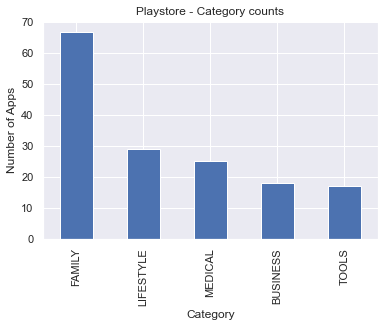

In [54]:
#Top five categories with respect to value count of app (rating=5)
df1.Category.value_counts(ascending=False).nlargest(5).sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.title("Playstore - Category counts")
plt.show()

In [55]:
#We read the top five categories in the apps
df["Category"].value_counts().nlargest(5).sort_values(ascending=False)

FAMILY          1711
GAME            1074
TOOLS            732
PRODUCTIVITY     334
FINANCE          317
Name: Category, dtype: int64

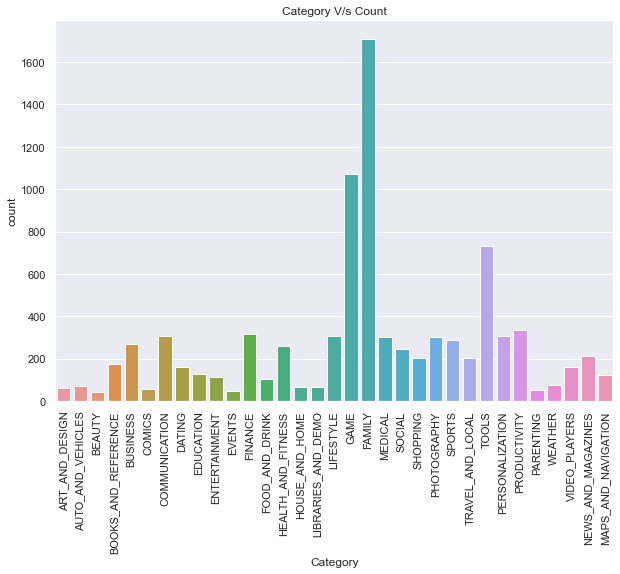

In [56]:
#df.Category.value_counts()
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
plt.xticks(rotation=90)
plt.title("Category V/s Count")
ax = sns.countplot(x="Category", data=df)

In [57]:
# Getting the measures of central tendency for all the installation grouped by "Category"
df.groupby("Category").Installs.agg(["min", "mean", "median", "max"])

,min,mean,median,max
Category,,,,
ART_AND_DESIGN,100,2.036526e+06,100000.0,50000000
AUTO_AND_VEHICLES,100,7.278055e+05,100000.0,10000000
BEAUTY,100,6.408619e+05,100000.0,10000000
BOOKS_AND_REFERENCE,5,1.082651e+07,100000.0,1000000000
BUSINESS,5,3.198215e+06,10000.0,100000000
COMICS,100,9.661397e+05,100000.0,10000000
COMMUNICATION,10,7.867180e+07,1000000.0,1000000000
DATING,10,1.298883e+06,100000.0,10000000
EDUCATION,1000,4.138388e+06,1000000.0,100000000


In [58]:
# Sorting (descending sorting) the dataframe by number of installs
df.sort_values(by="Installs", ascending= False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
386,Hangouts,COMMUNICATION,4.0,3419433.0,-1,1000000000,Free,0.0,Everyone
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13,1000000000,Free,0.0,Teen
4098,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9231613.0,-1,1000000000,Free,0.0,Everyone
3909,Instagram,SOCIAL,4.5,66509917.0,-1,1000000000,Free,0.0,Teen
2604,Instagram,SOCIAL,4.5,66577446.0,-1,1000000000,Free,0.0,Teen


In [59]:
#Here we make dataframe for top most installed apps
top_installed_apps=df.sort_values(by="Installs", ascending= False)

In [60]:
#We read first 5 rows of this dataframe
top_installed_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
386,Hangouts,COMMUNICATION,4.0,3419433.0,-1,1000000000,Free,0.0,Everyone
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13,1000000000,Free,0.0,Teen
4098,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9231613.0,-1,1000000000,Free,0.0,Everyone
3909,Instagram,SOCIAL,4.5,66509917.0,-1,1000000000,Free,0.0,Teen
2604,Instagram,SOCIAL,4.5,66577446.0,-1,1000000000,Free,0.0,Teen


In [61]:
# Apps with 1 billion installations (1b is the 1st greater class of installations in the dataset)
len(df[df["Installs"]>= 1000000000])

49

- There are 49 apps with greater than 1 billion installation

In [62]:
#Now making another dataframe that gives most installed and most rated apps
top_installed_and_rated_apps = df.sort_values(by=["Installs", "Rating"], ascending=False)
top_installed_and_rated_apps.head() # main top apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
1654,Subway Surfers,GAME,4.5,27722264.0,76,1000000000,Free,0.0,Everyone 10+
1700,Subway Surfers,GAME,4.5,27723193.0,76,1000000000,Free,0.0,Everyone 10+
1750,Subway Surfers,GAME,4.5,27724094.0,76,1000000000,Free,0.0,Everyone 10+
1872,Subway Surfers,GAME,4.5,27725352.0,76,1000000000,Free,0.0,Everyone 10+
2545,Instagram,SOCIAL,4.5,66577313.0,-1,1000000000,Free,0.0,Teen


In [63]:
#Now, we make dataframe for most installed and reviewed apps
top_installed_and_reviewed_apps = df.sort_values(by=["Installs", "Reviews"], ascending=False)
top_installed_and_reviewed_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
2544,Facebook,SOCIAL,4.1,78158306.0,-1,1000000000,Free,0.0,Teen
3943,Facebook,SOCIAL,4.1,78128208.0,-1,1000000000,Free,0.0,Teen
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,-1,1000000000,Free,0.0,Everyone
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,-1,1000000000,Free,0.0,Everyone
2604,Instagram,SOCIAL,4.5,66577446.0,-1,1000000000,Free,0.0,Teen


In [64]:
#Making another dataframe having 10 rows of the dataframetop_installed_and_rated_apps
top_10_installed_and_rated_apps= top_installed_and_rated_apps.head(10)

In [65]:
#finding top 10 installed and rated app 
top_10_installed_and_rated_apps.Category.sort_values(ascending=False)

2545         SOCIAL
2604         SOCIAL
2808    PHOTOGRAPHY
2853    PHOTOGRAPHY
2884    PHOTOGRAPHY
1654           GAME
1700           GAME
1750           GAME
1872           GAME
3896           GAME
Name: Category, dtype: object

In [66]:
# There are totally 8190 apps
df["App"].nunique()

8190

In [67]:
df["Content Rating"].nunique()

6

In [68]:
#Count for content rating in each of the category
df["Content Rating"].value_counts(ascending=False)

Everyone           7083
Teen               1021
Mature 17+          411
Everyone 10+        359
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

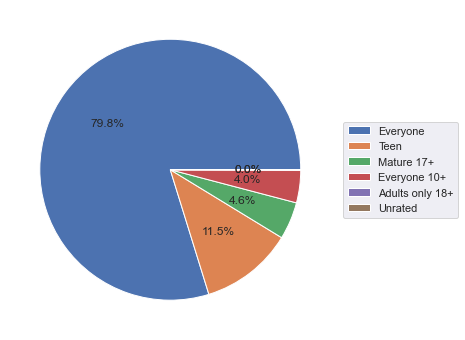

In [69]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
number_of_apps = df["Content Rating"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))

In [70]:
# In this and in the next 2 commands, i will try to see if there is any correlation between installations, Rating and Reviews

top_10_installed_and_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
1654,Subway Surfers,GAME,4.5,27722264.0,76,1000000000,Free,0.0,Everyone 10+
1700,Subway Surfers,GAME,4.5,27723193.0,76,1000000000,Free,0.0,Everyone 10+
1750,Subway Surfers,GAME,4.5,27724094.0,76,1000000000,Free,0.0,Everyone 10+
1872,Subway Surfers,GAME,4.5,27725352.0,76,1000000000,Free,0.0,Everyone 10+
2545,Instagram,SOCIAL,4.5,66577313.0,-1,1000000000,Free,0.0,Teen
2604,Instagram,SOCIAL,4.5,66577446.0,-1,1000000000,Free,0.0,Teen
2808,Google Photos,PHOTOGRAPHY,4.5,10858556.0,-1,1000000000,Free,0.0,Everyone
2853,Google Photos,PHOTOGRAPHY,4.5,10858538.0,-1,1000000000,Free,0.0,Everyone
2884,Google Photos,PHOTOGRAPHY,4.5,10859051.0,-1,1000000000,Free,0.0,Everyone
3896,Subway Surfers,GAME,4.5,27711703.0,76,1000000000,Free,0.0,Everyone 10+


In [71]:
# Reading top 10 apps sorted using rating
df.sort_values(by="Rating", ascending= False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
9536,Shabad Gurubani Punjabi mp3 free - Ek Onkar Sa...,FAMILY,5.0,5.0,64,100,Free,0.00,Everyone
9518,Asha Ek Hope - ALS/ MND,MEDICAL,5.0,2.0,11,100,Free,0.00,Everyone
10166,FA Player Essentials,SPORTS,5.0,7.0,68,100,Free,0.00,Everyone
7418,CJ Gospel Hour,SOCIAL,5.0,7.0,18,100,Free,0.00,Everyone
7405,Nur təfsiri 1-ci cild,LIBRARIES_AND_DEMO,5.0,15.0,1.4,1000,Free,0.00,Everyone
7402,Trovami se ci riesci,GAME,5.0,11.0,6.1,10,Free,0.00,Everyone
5268,AJ Rafael Music Lessons,FAMILY,5.0,1.0,8.2,10,Free,0.00,Everyone
6604,BP Log lite,LIFESTYLE,5.0,3.0,1.5,100,Free,0.00,Everyone
6605,MI-BP,HEALTH_AND_FITNESS,5.0,1.0,12,50,Free,0.00,Everyone
5263,AJ Blue Icon Pack,PERSONALIZATION,5.0,4.0,31,50,Paid,0.99,Everyone


In [72]:
#Here we read top  apps sorted by reviews
df.sort_values(by="Reviews", ascending= False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
2544,Facebook,SOCIAL,4.1,78158306.0,-1,1000000000,Free,0.0,Teen
3943,Facebook,SOCIAL,4.1,78128208.0,-1,1000000000,Free,0.0,Teen
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,-1,1000000000,Free,0.0,Everyone
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,-1,1000000000,Free,0.0,Everyone
2604,Instagram,SOCIAL,4.5,66577446.0,-1,1000000000,Free,0.0,Teen


In [73]:
#Here we read top  apps sorted by reviews
df.sort_values(by="Reviews", ascending= False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
2544,Facebook,SOCIAL,4.1,78158306.0,-1,1000000000,Free,0.0,Teen
3943,Facebook,SOCIAL,4.1,78128208.0,-1,1000000000,Free,0.0,Teen
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,-1,1000000000,Free,0.0,Everyone
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,-1,1000000000,Free,0.0,Everyone
2604,Instagram,SOCIAL,4.5,66577446.0,-1,1000000000,Free,0.0,Teen


In [74]:
top_10_installed_and_rated_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
1654,Subway Surfers,GAME,4.5,27722264.0,76,1000000000,Free,0.0,Everyone 10+
1700,Subway Surfers,GAME,4.5,27723193.0,76,1000000000,Free,0.0,Everyone 10+
1750,Subway Surfers,GAME,4.5,27724094.0,76,1000000000,Free,0.0,Everyone 10+
1872,Subway Surfers,GAME,4.5,27725352.0,76,1000000000,Free,0.0,Everyone 10+
2545,Instagram,SOCIAL,4.5,66577313.0,-1,1000000000,Free,0.0,Teen
2604,Instagram,SOCIAL,4.5,66577446.0,-1,1000000000,Free,0.0,Teen
2808,Google Photos,PHOTOGRAPHY,4.5,10858556.0,-1,1000000000,Free,0.0,Everyone
2853,Google Photos,PHOTOGRAPHY,4.5,10858538.0,-1,1000000000,Free,0.0,Everyone
2884,Google Photos,PHOTOGRAPHY,4.5,10859051.0,-1,1000000000,Free,0.0,Everyone
3896,Subway Surfers,GAME,4.5,27711703.0,76,1000000000,Free,0.0,Everyone 10+


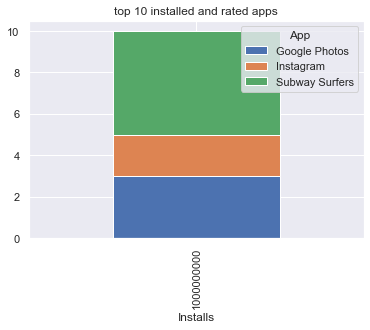

In [75]:
# We are looking for the top 10 apps that are installed and rated.
app4= top_10_installed_and_rated_apps
top_apps=app4.groupby(["Installs", "App"]).size().unstack()
top_apps.plot(kind="bar",stacked=True)
plt.title('top 10 installed and rated apps')
ax=plt.gca()
plt.show()

In [76]:
# Prices of the apps
df["Price"].value_counts().sort_values(ascending=False).head(10)

0.00    8268
2.99     110
0.99     104
4.99      68
1.99      59
3.99      55
1.49      30
2.49      20
5.99      14
9.99      14
Name: Price, dtype: int64

In [77]:
df.Price.nunique()

73

In [78]:
df.Type.value_counts()

Free    8268
Paid     610
Name: Type, dtype: int64

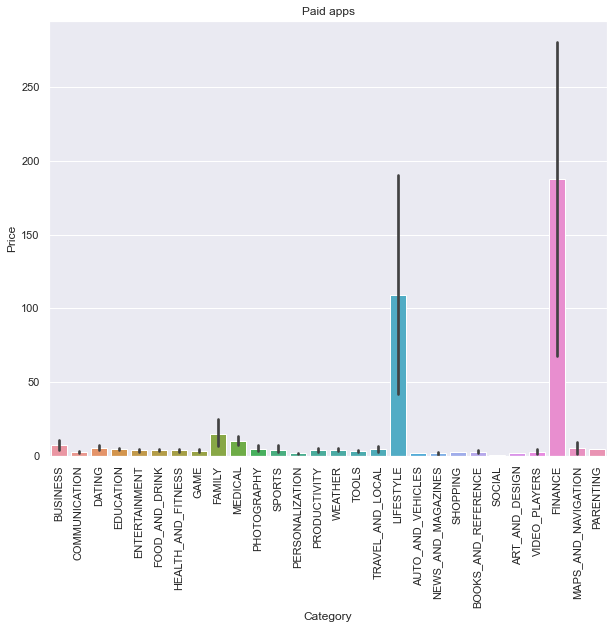

In [79]:
#Let's look at why family even though has lot of apps does not have the highest number of installs. Price could be one of the factors
paid_apps = df[df["Price"] != 0.0]

paid_family_apps = paid_apps[paid_apps["Category"]=="FAMILY"]
paid_family_apps.count()

paid_communications_apps = paid_apps[paid_apps["Category"]=="COMMUNICATION"]
paid_communications_apps.count()

#Let's visualize this in the form of a simple bar graph
plt.figure(figsize=(10,8))
sns.barplot(x="Category", y="Price", data=paid_apps,
            label="Total Paid Apps in Each Category")
plt.title("Paid apps")
plt.xticks(rotation=90)
plt.show()

- Above plot shows that the apps in the category Lifestyle and Finance have the highest prices.

In [80]:
#Here we look for the top five prices and the number of apps 
df["Price"].value_counts().nlargest(5).sort_values(ascending=False)

0.00    8268
2.99     110
0.99     104
4.99      68
1.99      59
Name: Price, dtype: int64

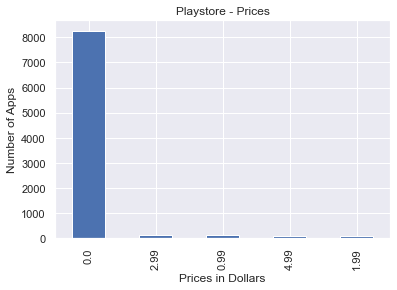

In [81]:
#Now we visualize it by using bar plot
df["Price"].value_counts().nlargest(5).sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Prices in Dollars")
plt.title("Playstore - Prices")
plt.show()

- This plot shows that data has more than 90% apps that are free 

(-1.1006390573344684,
 1.1000304313016414,
 -1.100484172839783,
 1.1024946974786016)

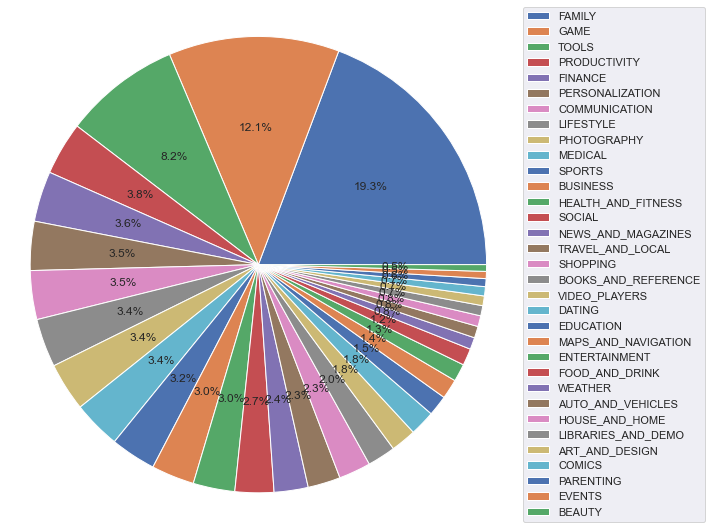

In [82]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(aspect="equal"))
number_of_apps = df["Category"].value_counts()
labels = number_of_apps.index
sizes = number_of_apps.values
ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")


In [83]:
# Here we see the category and count of top 100 installed apps
top_installed_and_rated_apps["Category"].head(100).value_counts()


COMMUNICATION          24
GAME                   19
TOOLS                  10
SOCIAL                  9
PRODUCTIVITY            9
NEWS_AND_MAGAZINES      7
VIDEO_PLAYERS           6
TRAVEL_AND_LOCAL        5
PHOTOGRAPHY             4
FAMILY                  4
ENTERTAINMENT           1
BOOKS_AND_REFERENCE     1
HEALTH_AND_FITNESS      1
Name: Category, dtype: int64

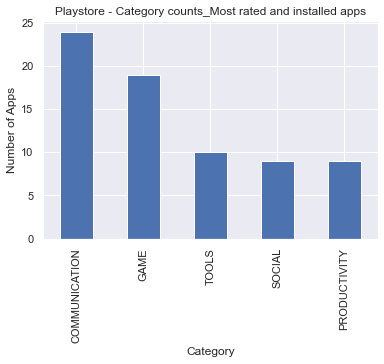

In [84]:
#Here We use the barplot to see the value counts of category in the top installed and rated apps
top_installed_and_rated_apps["Category"].head(100).value_counts().nlargest(5).sort_values(ascending=False).plot.bar()
plt.ylabel("Number of Apps")
plt.xlabel("Category")
plt.title("Playstore - Category counts_Most rated and installed apps")
plt.show()

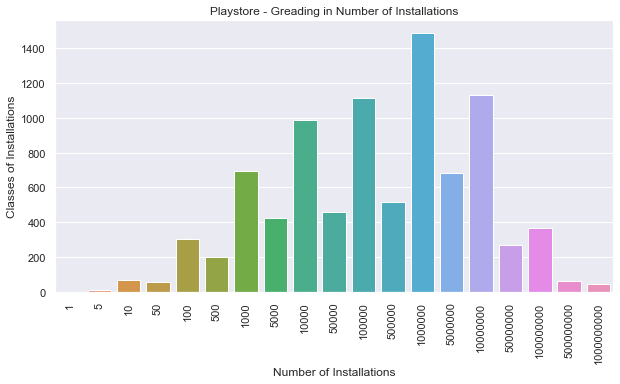

In [85]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Installs'].value_counts().index,
              y=df['Installs'].value_counts().values)
plt.xlabel('Number of Installations')
plt.ylabel('Classes of Installations')
plt.title('Playstore - Greading in Number of Installations')
plt.xticks(rotation=90)
plt.show()

In [86]:
# Top 5 Gradings in the number of installations
df["Installs"].value_counts().nlargest(5)

1000000     1484
10000000    1128
100000      1110
10000        988
1000         696
Name: Installs, dtype: int64

In [87]:
#we look at the classes of content rating and their value counts
df["Content Rating"].value_counts()

Everyone           7083
Teen               1021
Mature 17+          411
Everyone 10+        359
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

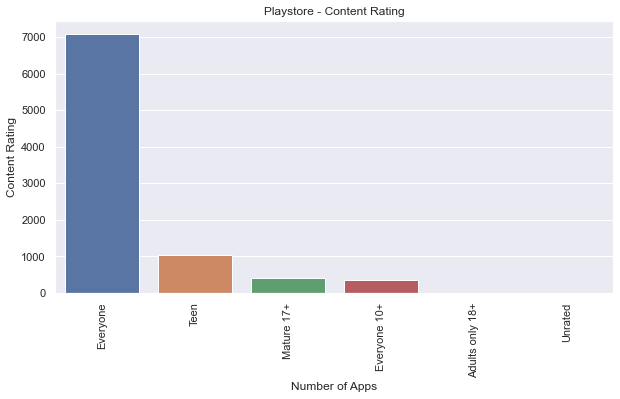

In [88]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['Content Rating'].value_counts().index,
              y=df['Content Rating'].value_counts().values)
plt.xlabel('Number of Apps')
plt.ylabel('Content Rating')
plt.title('Playstore - Content Rating')
plt.xticks(rotation=90)
plt.show()

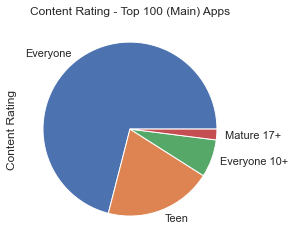

In [89]:
#Here we look for the content rating distribution using pie chart
app1=top_installed_and_rated_apps.head(100)
app1["Content Rating"].value_counts().plot.pie()
plt.title("Content Rating - Top 100 (Main) Apps")
plt.show()